In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scanpy as sc
import anndata as ad
import torch

Loading the dataset

In [9]:
os.chdir("../data/immune_dictionary")
cell_types = ["B_cell", "T_cell_CD4", "T_cell_CD8"]
dirs = [f"{i}_ref_data.h5ad" for i in cell_types]
for i, dir in enumerate(dirs):
    adata = sc.read(dir)
    if i == 0:
        merged = adata
        continue
    merged = sc.concat([merged, adata], join="outer")
merged.var["gene_symbol"] = adata.var.index
merged.obs["condition"] = merged.obs["sample"]

In [10]:
merged

AnnData object with n_obs × n_vars = 25486 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition'
    var: 'gene_symbol'
    obsm: 'X_pca', 'X_tsne'

Preprocessing

In [11]:
#identify mitochondrial genes
merged.var["mt"] = merged.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(merged, qc_vars=["mt"], inplace=True)

/home/yalda_y/mambaforge/envs/state_transition/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


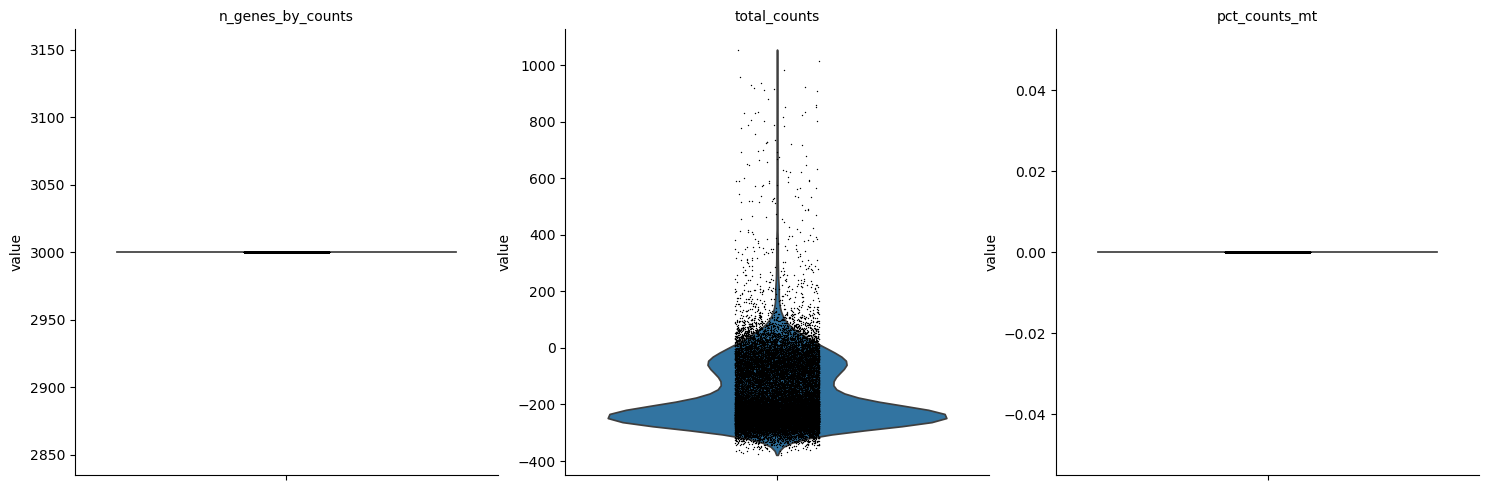

In [12]:
#Why are there negative total counts?!
sc.pl.violin(
    merged,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    multi_panel=True 
      )

In [8]:
#not for now
#sc.pp.filter_cells(merged, min_counts=100)
#sc.pp.filter_genes(merged, min_cells=10)

In [13]:
#filter CD8 T cells
T_cell_CD8 = merged[merged.obs["celltype"]=="T_cell_CD8"]

In [14]:
T_cell_CD8

View of AnnData object with n_obs × n_vars = 8700 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'X_pca', 'X_tsne'

In [15]:
#filter CD4 T cells
T_cell_CD4 = merged[merged.obs["celltype"]=="T_cell_CD4"]

In [16]:
T_cell_CD4

View of AnnData object with n_obs × n_vars = 8700 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'X_pca', 'X_tsne'

In [17]:
#filter B cells
B_cell = merged[merged.obs["celltype"]=="B_cell"]

In [18]:
B_cell

View of AnnData object with n_obs × n_vars = 8086 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'X_pca', 'X_tsne'

In [40]:
#run umap on all
sc.pp.neighbors(merged)
sc.tl.umap(merged)

In [25]:
#run umap on CD8
sc.pp.neighbors(T_cell_CD8)
sc.tl.umap(T_cell_CD8)

In [65]:
#run umap on CD4
sc.pp.neighbors(T_cell_CD4)
sc.tl.umap(T_cell_CD4)

In [70]:
#run umap on B_cell
sc.pp.neighbors(B_cell)
sc.tl.umap(B_cell)

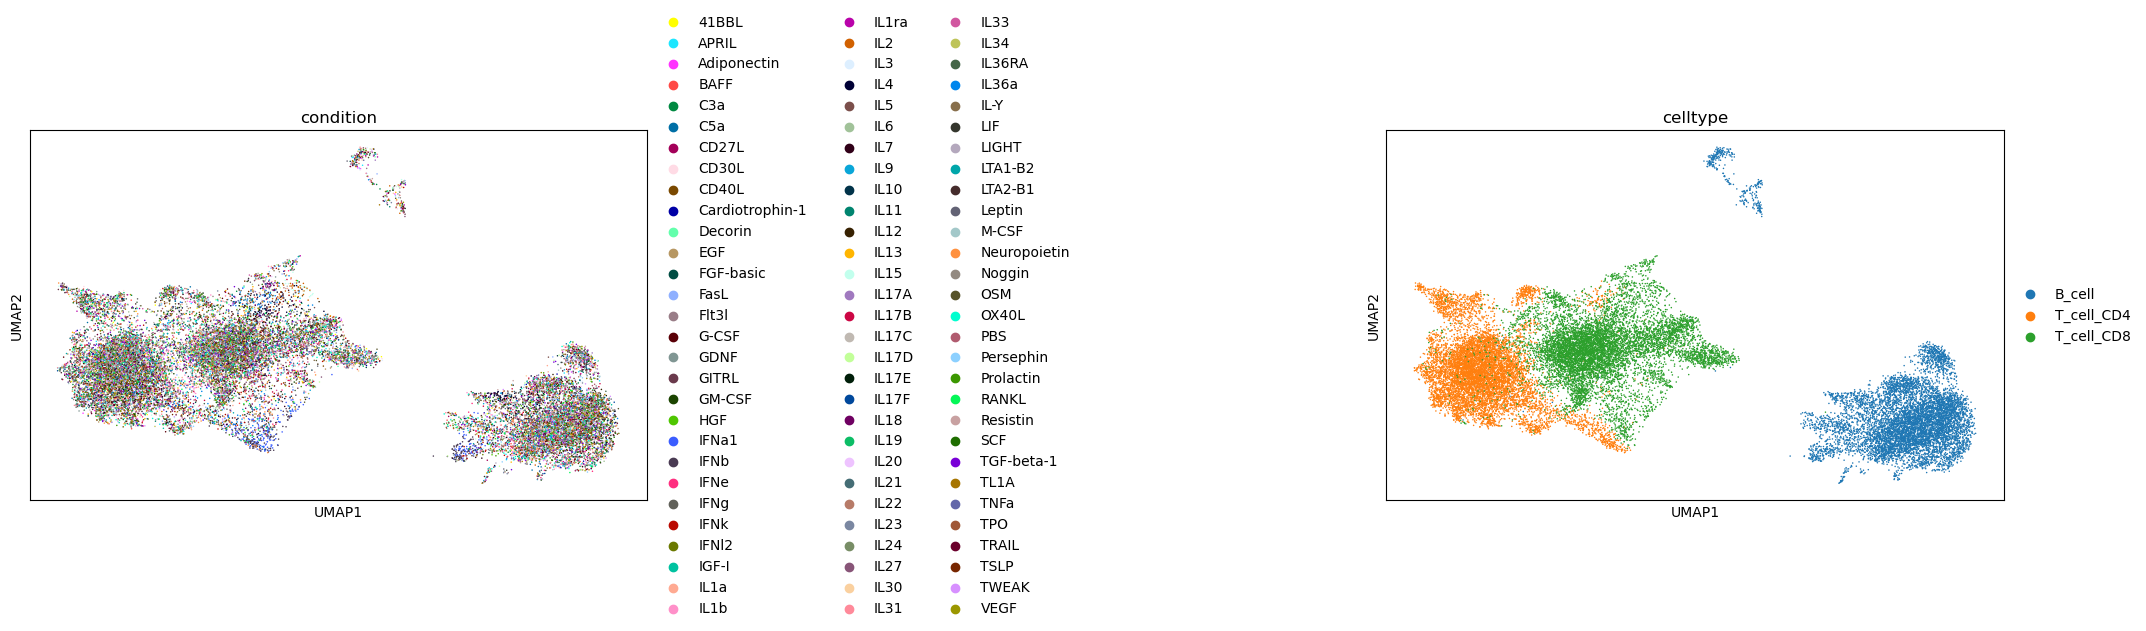

In [45]:
sc.pl.umap(merged, color=["condition", "celltype"], wspace=1)

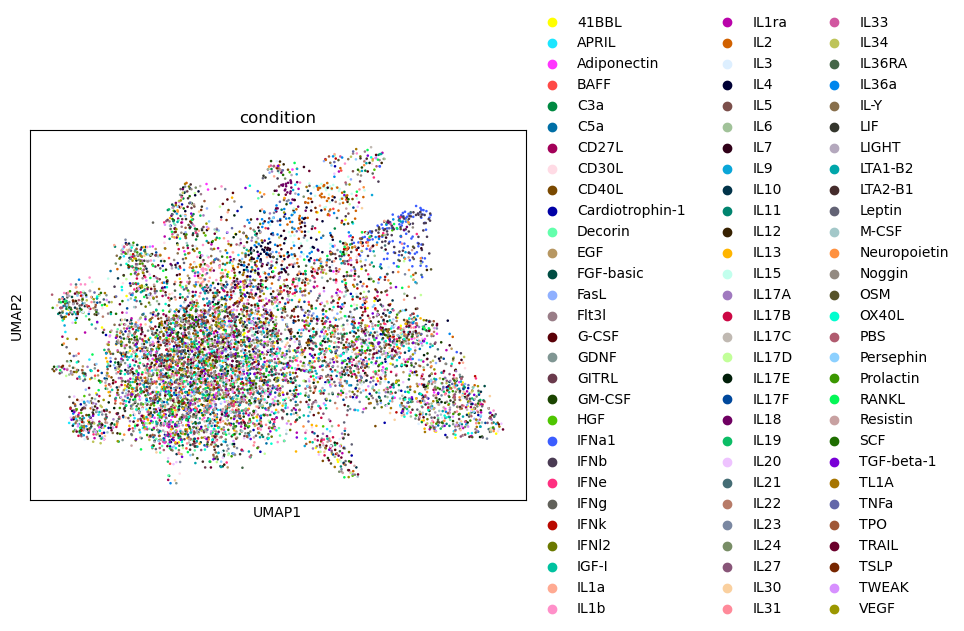

In [32]:
sc.pl.umap(T_cell_CD8, color="condition")

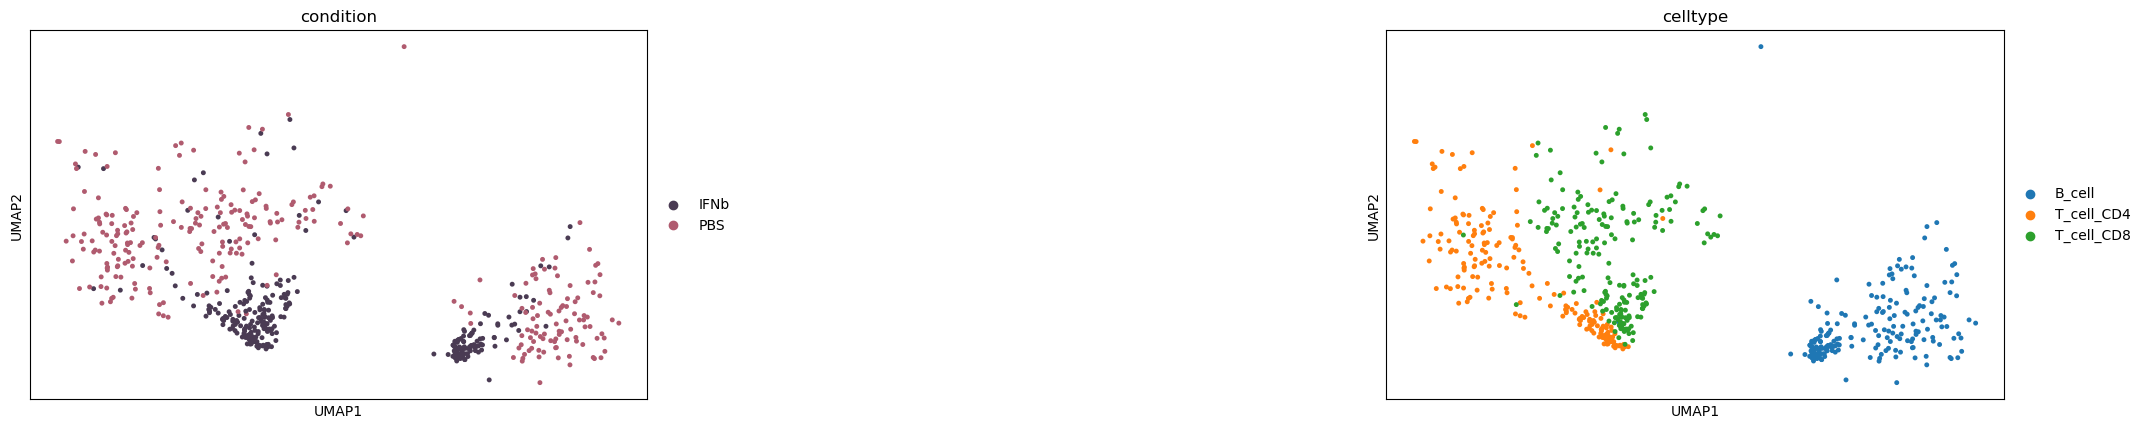

In [55]:
#PBS is control
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IFNb"])], 
           color=["condition", "celltype"], wspace=1, size=50)

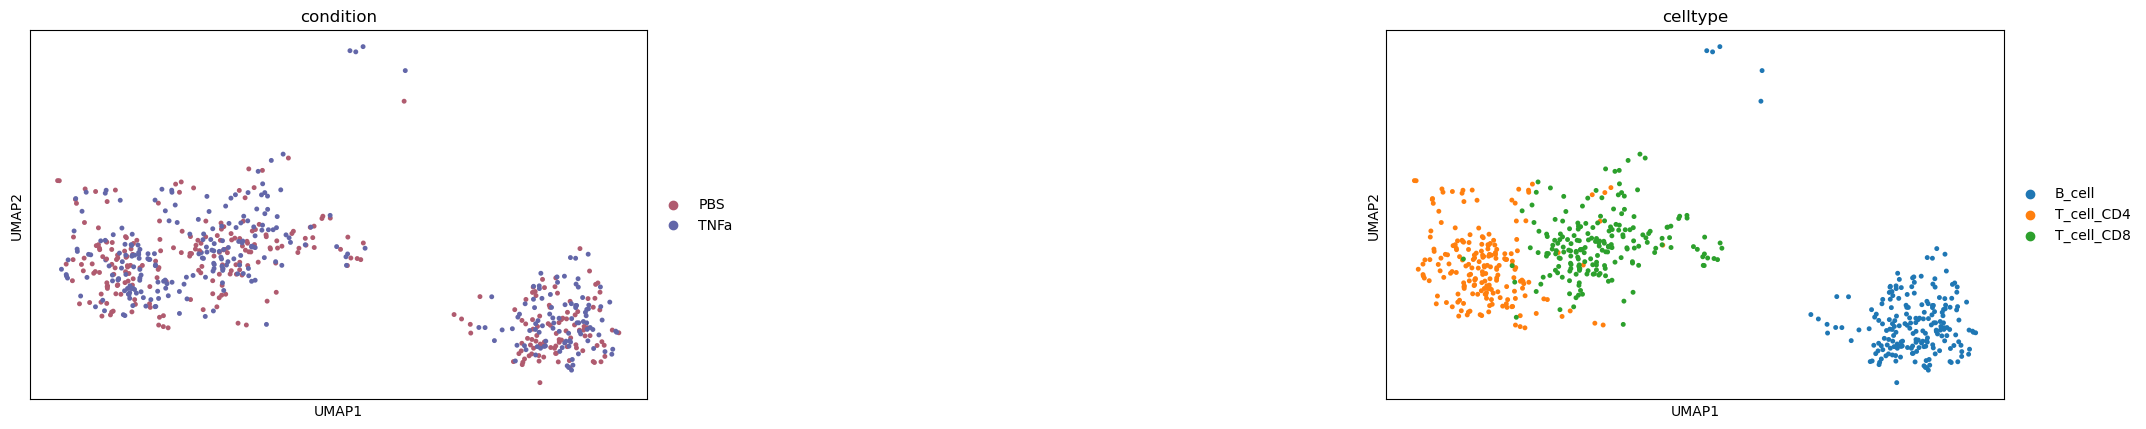

In [59]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "TNFa"])], 
           color=["condition", "celltype"], wspace=1, size=50)

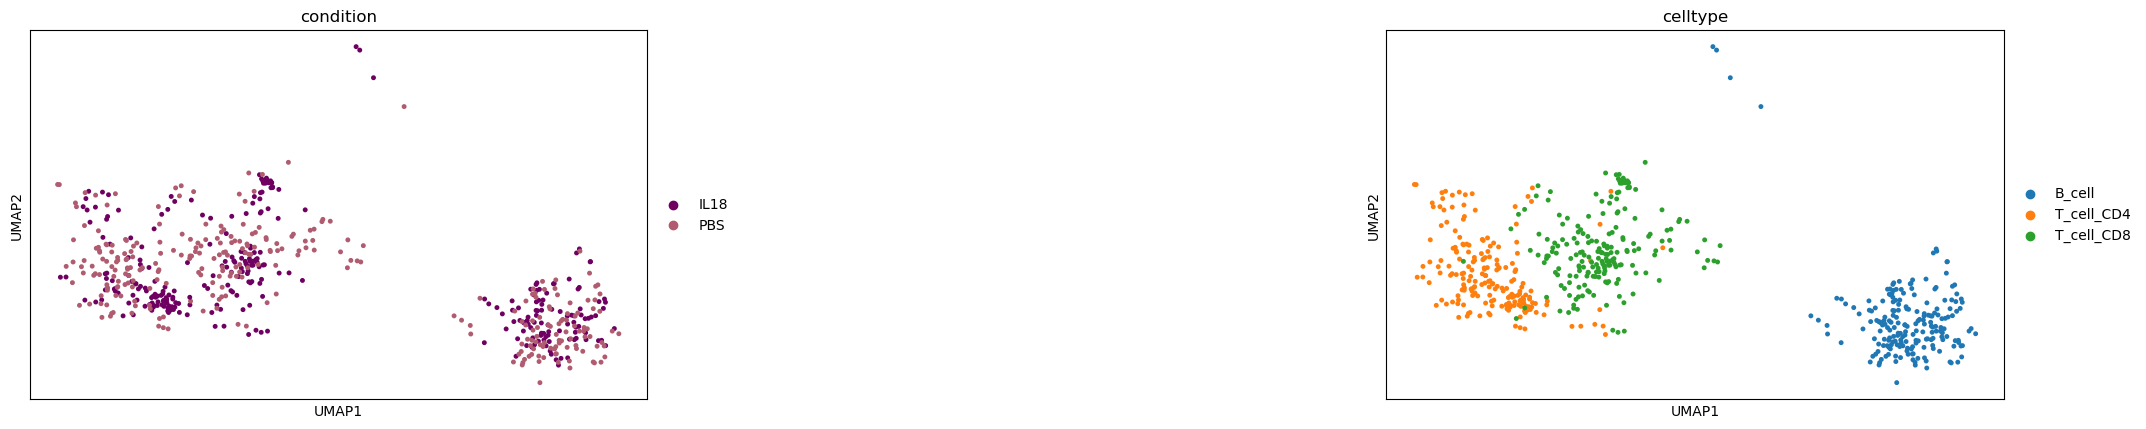

In [60]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IL18"])], 
           color=["condition", "celltype"], wspace=1, size=50)

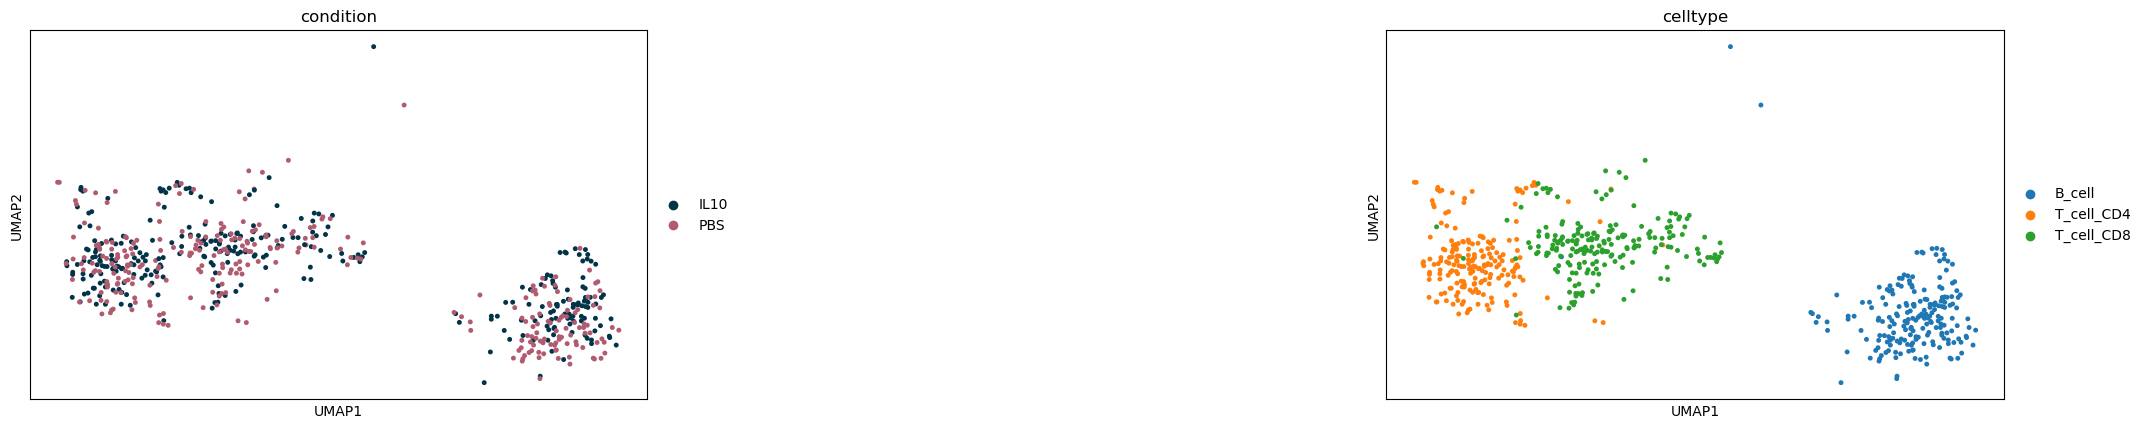

In [56]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IL10"])], 
           color=["condition", "celltype"], wspace=1, size=50)

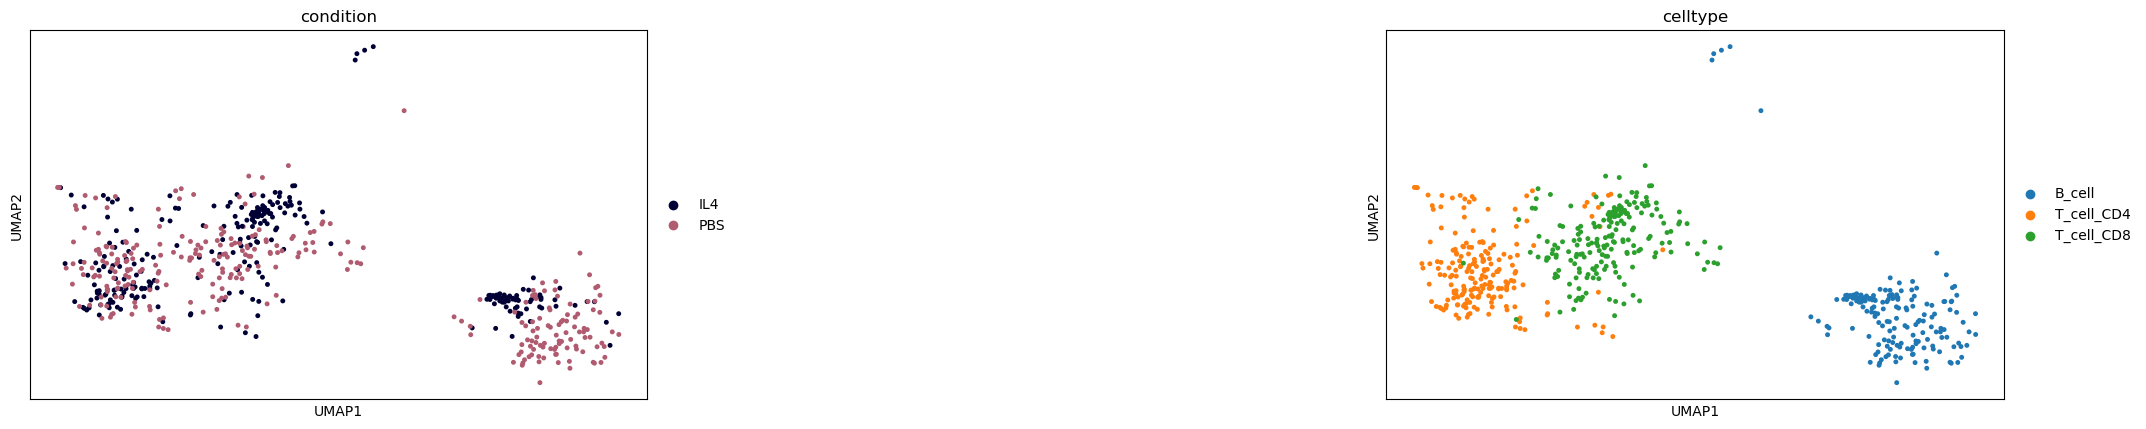

In [53]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IL4"])], 
           color=["condition", "celltype"], wspace=1, size=50)

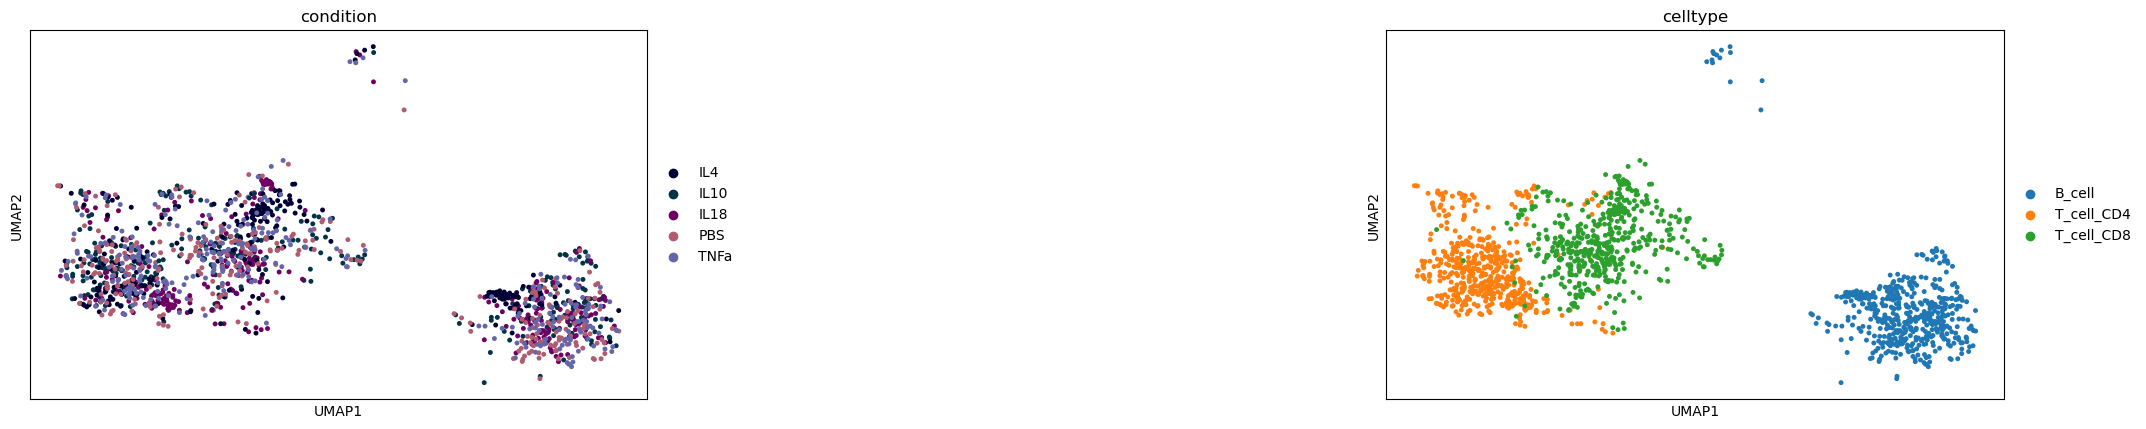

In [61]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IL4", "IL10", "IL18", "TNFa"])], 
           color=["condition", "celltype"], wspace=1, size=50)

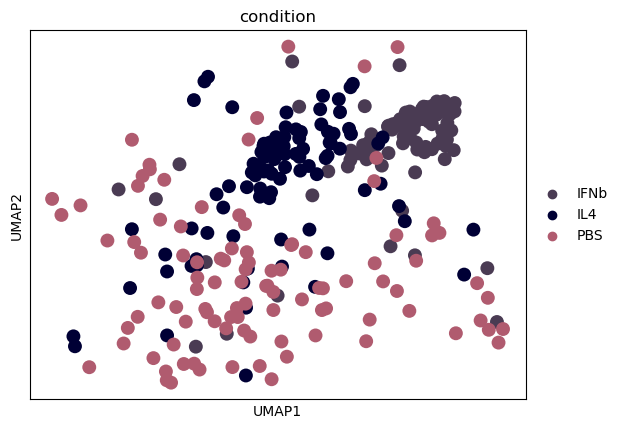

In [67]:
sc.pl.umap(T_cell_CD8[T_cell_CD8.obs["condition"].isin(["PBS", "IL4", "IFNb"])], color="condition")

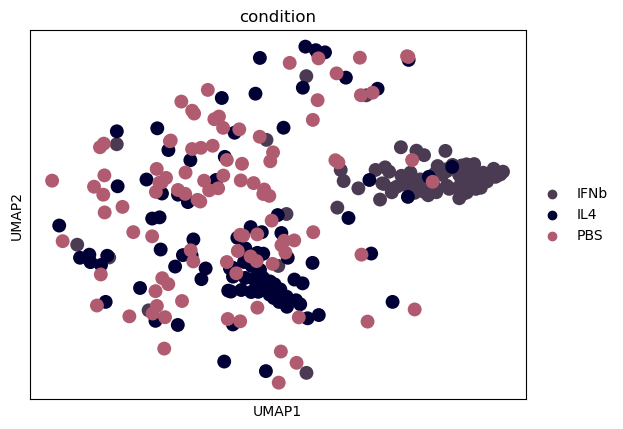

In [72]:
sc.pl.umap(T_cell_CD4[T_cell_CD4.obs["condition"].isin(["PBS", "IL4", "IFNb"])], color="condition")

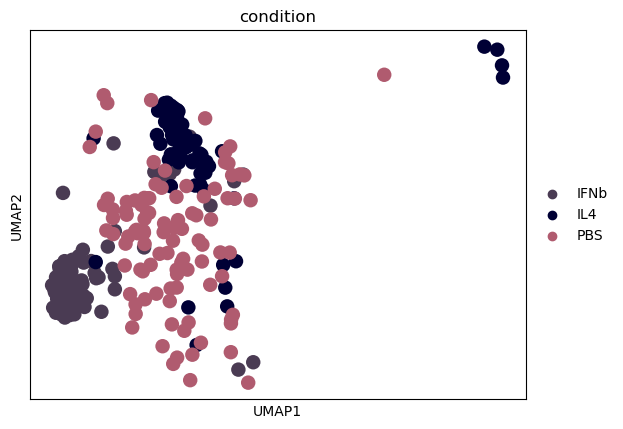

In [78]:
sc.pl.umap(B_cell[B_cell.obs["condition"].isin(["PBS", "IL4", "IFNb"])], color="condition")

Comparing distributions of perturbations

In [3]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def MMD(x, y, kernel):
    """Emprical maximum mean discrepancy. The lower the result
       the more evidence that distributions are the same.

    Args:
        x: first sample, distribution P
        y: second sample, distribution Q
        kernel: kernel type such as "multiscale" or "rbf"
    """
    xx, yy, zz = torch.mm(x, x.t()), torch.mm(y, y.t()), torch.mm(x, y.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))
    
    dxx = rx.t() + rx - 2. * xx 
    dyy = ry.t() + ry - 2. * yy 
    dxy = rx.t() + ry - 2. * zz 
    
    XX, YY, XY = (torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device))
    
    if kernel == "multiscale":
        
        bandwidth_range = [0.2, 0.5, 0.9, 1.3]
        for a in bandwidth_range:
            XX += a**2 * (a**2 + dxx)**-1
            YY += a**2 * (a**2 + dyy)**-1
            XY += a**2 * (a**2 + dxy)**-1
            
    if kernel == "rbf":
      
        bandwidth_range = [10, 15, 20, 50]
        for a in bandwidth_range:
            XX += torch.exp(-0.5*dxx/a)
            YY += torch.exp(-0.5*dyy/a)
            XY += torch.exp(-0.5*dxy/a)
      
      

    return torch.mean(XX + YY - 2. * XY)

In [47]:
cytokines = ["PBS", "IFNg", "IL2", "IL4", "TNFa"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].X) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].X) for i in cytokines]

df = pd.DataFrame(np.zeros((5,5)))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df.loc[i, j] = float(MMD(T_cell_CD4_list[i][:B_cell_list[j].shape[0],], B_cell_list[j], "multiscale"))
        else:
            df.loc[i, j] = float(MMD(T_cell_CD4_list[i], B_cell_list[j][:T_cell_CD4_list[i].shape[0],], "multiscale"))


In [49]:
df.columns=[ "B_cell_ctrl", "B_cell_IFNg", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]
df.index=["T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]

In [50]:
df
#diagonals are not the lowest values (highest similarities)

,B_cell_ctrl,B_cell_IFNg,B_cell_IL2,B_cell_IL4,B_cell_TNFa
T_cell_CD4_ctrl,0.080949,0.120412,0.106238,0.104973,0.080999
T_cell_CD4_IFNg,0.080947,0.120366,0.106197,0.104953,0.080992
T_cell_CD4_IL2,0.080787,0.120183,0.106034,0.104797,0.080835
T_cell_CD4_IL4,0.081187,0.120562,0.106418,0.105132,0.081230
T_cell_CD4_TNFa,0.081098,0.120464,0.106309,0.105059,0.081141


Comparing distributions of perturbations after dimensionality reduction with PCA

In [52]:
sc.pp.pca(merged, n_comps=100)
merged

AnnData object with n_obs × n_vars = 25486 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [57]:
cytokines = ["PBS", "IFNg", "IL2", "IL4", "TNFa"]

B_cell = merged[merged.obs["celltype"]=="B_cell"]
T_cell_CD4 = merged[merged.obs["celltype"]=="T_cell_CD4"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]

df_pca = pd.DataFrame(np.zeros((5,5)))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df_pca.loc[i, j] = float(MMD(T_cell_CD4_list[i][:B_cell_list[j].shape[0],], B_cell_list[j], "multiscale"))
        else:
            df_pca.loc[i, j] = float(MMD(T_cell_CD4_list[i], B_cell_list[j][:T_cell_CD4_list[i].shape[0],], "multiscale"))


In [58]:
df_pca.columns=[ "B_cell_ctrl", "B_cell_IFNg", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]
df_pca.index=["T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]

In [59]:
df_pca
#diagonals are not the lowest values (highest similarities)

,B_cell_ctrl,B_cell_IFNg,B_cell_IL2,B_cell_IL4,B_cell_TNFa
T_cell_CD4_ctrl,0.100097,0.139713,0.125007,0.124447,0.100486
T_cell_CD4_IFNg,0.099329,0.140077,0.124709,0.124683,0.099659
T_cell_CD4_IL2,0.099569,0.139948,0.125087,0.124700,0.099920
T_cell_CD4_IL4,0.104534,0.145352,0.129733,0.129241,0.104873
T_cell_CD4_TNFa,0.103049,0.141938,0.127164,0.126961,0.103400


Calculate difference vectors to see if they are similar between cell types

In [74]:
B_cell_IFNg_vec = calc_dif_vec(B_cell, "PBS", "IFNg")
B_cell_IL2_vec = calc_dif_vec(B_cell, "PBS", "IL2")
B_cell_IL4_vec = calc_dif_vec(B_cell, "PBS", "IL4")
B_cell_TNFa_vec = calc_dif_vec(B_cell, "PBS", "TNFa")

In [75]:
T_cell_CD4_IFNg_vec = calc_dif_vec(T_cell_CD4, "PBS", "IFNg")
T_cell_CD4_IL2_vec = calc_dif_vec(T_cell_CD4, "PBS", "IL2")
T_cell_CD4_IL4_vec = calc_dif_vec(T_cell_CD4, "PBS", "IL4")
T_cell_CD4_TNFa_vec = calc_dif_vec(T_cell_CD4, "PBS", "TNFa")

In [79]:
vec_sim_df = pd.DataFrame(np.zeros((4,4)))

B_cell_vec_list = [B_cell_IFNg_vec, B_cell_IL2_vec, B_cell_IL4_vec, B_cell_TNFa_vec]
T_cell_CD4_vec_list = [T_cell_CD4_IFNg_vec, T_cell_CD4_IL2_vec, T_cell_CD4_IL4_vec, T_cell_CD4_TNFa_vec]

for i in range(len(T_cell_CD4_vec_list)):
    for j in range(len(B_cell_vec_list)):
        vec_sim_df.loc[i, j] = np.dot(T_cell_CD4_vec_list[i], B_cell_vec_list[j])

In [81]:
vec_sim_df.columns = ["B_cell_IFNg_vec", "B_cell_IL2_vec", "B_cell_IL4_vec", "B_cell_TNFa_vec"]
vec_sim_df.index = ["T_cell_CD4_IFNg_vec", "T_cell_CD4_IL2_vec", "T_cell_CD4_IL4_vec", "T_cell_CD4_TNFa_vec"]
vec_sim_df
#vectors for the same perturbation are similar between B cells and CD4 T cells

,B_cell_IFNg_vec,B_cell_IL2_vec,B_cell_IL4_vec,B_cell_TNFa_vec
T_cell_CD4_IFNg_vec,21.196917,8.436339,6.579055,2.966673
T_cell_CD4_IL2_vec,11.194213,6.809628,8.663472,2.115041
T_cell_CD4_IL4_vec,8.861312,6.071110,25.194920,3.115245
T_cell_CD4_TNFa_vec,9.719790,5.740767,9.420725,3.416337


Calculate similarity between each cytokine's pathway with others

In [161]:
#calculate similarity between vectors of all types of Interleukin perturbation
def calc_dif_vec(adata, ctrl, pert):
    ctrl_mean = adata[adata.obs["condition"]==ctrl].obsm["X_pca"].mean(axis=0) 
    pert_mean = adata[adata.obs["condition"]==pert].obsm["X_pca"].mean(axis=0)
    return pert_mean - ctrl_mean

ILs = [i for i in list(set(B_cell.obs["condition"])) if i.startswith("IL")]

dif_vec_dic = {}
for il in ILs:
    dif_vec_dic[il] = calc_dif_vec(B_cell, "PBS", il)

all_vectors = list(dif_vec_dic.values())
vec_sim_df = pd.DataFrame(np.zeros((len(all_vectors), len(all_vectors))))

for i in range(len(all_vectors)):
    for j in range(len(all_vectors)):
        vec_sim_df.loc[i, j] = np.dot(all_vectors[i], all_vectors[j])

vec_sim_df.columns = ILs
vec_sim_df.index = ILs
vec_sim_df

#some similar Interleukins have high vector similarity (IL1a, IL1b, IL2, IL6)

,IL23,IL17D,IL36a,IL1b,IL4,IL33,IL1a,IL22,IL24,IL11,...,IL31,IL12,IL-Y,IL13,IL5,IL17F,IL9,IL3,IL7,IL21
IL23,27.413738,2.655710,12.716857,-2.832584,15.796623,9.997157,2.612276,2.670448,1.388615,13.420514,...,5.055125,11.339972,6.310135,8.083570,13.397780,12.079729,5.297779,11.601901,14.389784,11.750980
IL17D,2.655710,16.983389,6.807898,12.097791,8.318425,3.058621,7.183117,6.818142,2.318957,5.124022,...,8.986272,3.672290,6.804746,7.861949,6.087690,5.147378,6.614240,9.134183,2.694051,6.195110
IL36a,12.716857,6.807898,28.391214,14.027627,24.407726,10.112220,14.527493,7.107998,3.917850,9.355135,...,7.321688,15.751925,4.726284,7.254266,13.199635,6.266881,12.158555,12.374891,16.092396,19.968452
IL1b,-2.832584,12.097791,14.027627,34.759239,24.529484,-1.208518,21.770542,5.997255,3.132273,-0.251838,...,7.938380,1.963442,5.076082,5.148523,6.496065,-0.298728,8.644224,9.882652,2.881105,11.043876
IL4,15.796623,8.318425,24.407726,24.529484,142.220963,8.252564,23.198668,4.999095,8.595820,5.733768,...,8.950645,17.899929,7.271986,9.176386,34.723709,7.081666,25.913839,24.580387,13.962831,35.846958
IL33,9.997157,3.058621,10.112220,-1.208518,8.252564,17.667006,3.846589,3.697021,5.810225,10.805322,...,5.386654,13.717541,4.785244,3.439740,8.017130,6.727682,7.173330,6.562338,13.271068,11.135579
IL1a,2.612276,7.183117,14.527493,21.770542,23.198668,3.846589,25.752005,5.499101,4.139545,3.168542,...,4.018196,6.384072,3.452837,2.964221,6.935034,1.823002,8.382085,9.917173,9.155663,16.674360
IL22,2.670448,6.818142,7.107998,5.997255,4.999095,3.697021,5.499101,11.746323,3.831137,5.413662,...,7.892039,5.676289,2.968256,4.986259,6.691217,4.351805,6.415687,7.787346,7.521139,7.231544
IL24,1.388615,2.318957,3.917850,3.132273,8.595820,5.810225,4.139545,3.831137,14.204258,4.920259,...,4.115625,5.246615,4.128172,3.508026,5.561473,2.396718,5.882259,4.380947,3.508932,7.240602
IL11,13.420514,5.124022,9.355135,-0.251838,5.733768,10.805322,3.168542,5.413662,4.920259,17.627079,...,7.421884,10.144197,6.561494,9.394517,11.913204,7.659260,5.909866,10.590931,10.517886,11.077433


In [83]:
#load functional interactions from reactome pathways
interactions = pd.read_excel("../reactome_FIsInGene_061424_with_annotations.xlsx")

In [84]:
interactions

,Gene1,Gene2,Annotation,Direction,Score
0,A1CF,APOBEC1,catalyzed by; complex; input,<-,1.00
1,A1CF,EP300,expression regulated by,<-,1.00
2,A1CF,RBM47,predicted,-,0.89
3,A2M,APOA1,inhibit,-|,1.00
4,A2M,BMP1,inhibit,-|,1.00
...,...,...,...,...,...
269784,ZW10,ZWILCH,complex; input,-,1.00
269785,ZW10,ZWINT,complex; input,-,1.00
269786,ZWILCH,ZWINT,complex; input,-,1.00
269787,ZXDA,ZXDB,predicted,-,0.96


In [86]:
interactions.describe()

,Score
count,269789.000000
mean,0.975873
std,0.039865
min,0.890000
25%,0.940000
50%,1.000000
75%,1.000000
max,1.000000


In [98]:
interactions[["Gene1", "Gene2"]]
interaction_list = list(zip(interactions["Gene1"], interactions["Gene2"]))

In [108]:
#create a graph from list of interactions
import networkx as nx
G = nx.from_edgelist(interaction_list)

In [109]:
#number of genes the interactions cover
len(G.nodes)

13294

In [199]:
#Get neighbors of the interleukin receptors in the graph
IL_receptors_dic = {}
for il in ILs:
    receptors = [i for i in list(G.nodes) if f"{il}R" in i]
    IL_receptors_dic[il] = receptors

neighbors = {}

def get_first_neighbors(g, gene_list):
    neighbors = []
    for gene in gene_list:
        n = list(g.neighbors(gene))
        neighbors.extend(n)
    return list(set(neighbors))

def combine_n_distant_neighbors(g, gene_list, n=1):
    neighbors = []
    i=0
    while i<n:
        gene_list = get_first_neighbors(g, gene_list)
        neighbors.extend(gene_list)
        i+=1
    return list(set(neighbors))
  
for il in ILs:
    il_neighbors = combine_n_distant_neighbors(G, IL_receptors_dic[il], n=1)
    neighbors[il] = il_neighbors


In [200]:
def jaccard(list1, list2):
    intersect = len(set(list1).intersection(set(list2)))
    union = len(list(set(list1+list2)))
    if union==0:
        return 0
    return intersect/union

In [201]:
neighbors_list = list(neighbors.values())
jaccard_similarities = pd.DataFrame(np.zeros((len(ILs),len(ILs))))
for i in range(len(ILs)):
    for j in range(len(ILs)):
        jaccard_index = jaccard(neighbors_list[i], neighbors_list[j])
        jaccard_similarities.loc[i, j] = jaccard_index

jaccard_similarities.columns = ILs
jaccard_similarities.index = ILs
jaccard_similarities
#some of the interleukins had no receptor in the interactions list

,IL23,IL17D,IL36a,IL1b,IL4,IL33,IL1a,IL22,IL24,IL11,...,IL31,IL12,IL-Y,IL13,IL5,IL17F,IL9,IL3,IL7,IL21
IL23,1.000000,0.0,0.0,0.0,0.150943,0.0,0.0,0.066667,0.0,0.055556,...,0.000000,0.192308,0.0,0.113636,0.087719,0.0,0.120000,0.089286,0.025974,0.153846
IL17D,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
IL36a,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
IL1b,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
IL4,0.150943,0.0,0.0,0.0,1.000000,0.0,0.0,0.060000,0.0,0.404762,...,0.023256,0.250000,0.0,0.590909,0.383333,0.0,0.166667,0.389831,0.086957,0.159091
IL33,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
IL1a,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
IL22,0.066667,0.0,0.0,0.0,0.060000,0.0,0.0,1.000000,0.0,0.034483,...,0.071429,0.035714,0.0,0.078947,0.018868,0.0,0.111111,0.019231,0.028986,0.100000
IL24,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
IL11,0.055556,0.0,0.0,0.0,0.404762,0.0,0.0,0.034483,0.0,1.000000,...,0.050000,0.150943,0.0,0.566667,0.363636,0.0,0.040000,0.372093,0.040541,0.120000


In [202]:
jaccard_index_list = [i[0] for i in jaccard_similarities.values.reshape(-1,1)]
vec_sim_list = [i[0] for i in vec_sim_df.values.reshape(-1,1)]
import scipy
scipy.stats.pearsonr(jaccard_index_list, vec_sim_list)[0]
#correlation between receptor neighbors similarity and vector similiarity


0.4349717779693088